# 자전거 파일 분석

서울특별시 공공자전거 대여이력 정보 2019년 6월

서울특별시 공공자전거 대여정보_201906_1.csv

서울특별시 공공자전거 대여정보_201906_2.csv

서울특별시 공공자전거 대여정보_201906_3.csv

# **사전준비 for colab**
matplotlib 그래프 내 한글 글꼴 표시를 위한 설치 및 런타임 다시 시작과 폰트 설정 작업을 단계별로 수행한다.

## [1] 폰트 설치 (나눔글꼴) 및 폰트매니저 재구성

In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 시스템내 최초 설치된 폰트개수 확인 - 처음에는 기본 폰트만 설치됨

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

In [ ]:
# 나눔고디 폰트 설치

!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 설치 후  폰트 개수 확인,  늘어 난 것을 알 수 있다.

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

In [ ]:
# 폰트 매니저 재설정을 위한 명령문 수행 : fm._rebuild()
import matplotlib.font_manager as fm
fm._rebuild()

## [2] 폰트 인식을 위한  '런타임 다시시작'
  - '런타임' - '런타임 다시 시작' 
  - 또는 'Ctrl-M'


## [3] 런타임 재시작 이후 
   - 폰트  설정 및 마이너스 부호 오류 처리
   - **시작 이후에는 본 셀 이후 부터 실행한다.**

In [ ]:
# 관련 라이브러리 임포트
import matplotlib.font_manager as fm  # 폰트 관련 
import matplotlib.pyplot as plt   # 그래프 내 설정
import matplotlib as mpl  # 기본 설정 

In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 런타임 다시 시작 이후, 설치 된 폰트 개수가 증가 한 상태임을 알 수 있다. 
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

In [ ]:
# 폰트의 경로를 통해 사용할 폰트 (나눔고딕)를 지정한다.
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 사용할 폰트의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 마이너스 부호 처리에 오류가 있는 경우를 방지 하기 위한 설정
mpl.rcParams['axes.unicode_minus'] = False  

# 1. 데이터 수집 및 라이브러리 임포트

In [ ]:
import pandas as pd

pd.options.display.float_format = '{:.2f}'.format

# 2. 데이터 가공

## 2-1. 분석할 데이터프레임 만들기

In [ ]:
#  2019년 6월 3개로 나누어진 파일을 읽어 들인다.
#  첫번째 파일을 읽어들이고 확인한다.

bike_1 = pd.read_csv('https://github.com/sagelab4data/first_da_2021_1/blob/main/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B3%B5%EA%B3%B5%EC%9E%90%EC%A0%84%EA%B1%B0%20%EB%8C%80%EC%97%AC%EC%A0%95%EB%B3%B4_201906_1.csv?raw=true', \
                      encoding = 'cp949', parse_dates=['대여일시','반납일시'])



In [ ]:
#  2019년 6월 3개로 나누어진 파일을 읽어 들인다.
#  두번째 파일을 읽어들이고 확인한다.

bike_2 = pd.read_csv('https://github.com/sagelab4data/first_da_2021_1/blob/main/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B3%B5%EA%B3%B5%EC%9E%90%EC%A0%84%EA%B1%B0%20%EB%8C%80%EC%97%AC%EC%A0%95%EB%B3%B4_201906_2.csv?raw=true', \
                      encoding = 'cp949', parse_dates=['대여일시','반납일시'])



In [ ]:
#  2019년 6월 3개로 나누어진 파일을 읽어 들인다.
#  세번째 파일을 읽어들이고 확인한다.

bike_3 = pd.read_csv('https://github.com/sagelab4data/first_da_2021_1/blob/main/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B3%B5%EA%B3%B5%EC%9E%90%EC%A0%84%EA%B1%B0%20%EB%8C%80%EC%97%AC%EC%A0%95%EB%B3%B4_201906_3.csv?raw=true', \
                      encoding = 'cp949', parse_dates=['대여일시','반납일시'])


In [ ]:
# 세개의 데이터프레임 bike_1, bike_2, bike_3를 합치고 최종 데이터프레임 bike_ride를 확인한다.

bike_ride = pd.concat([bike_1, bike_2, bike_3], axis = 'index', ignore_index = True)


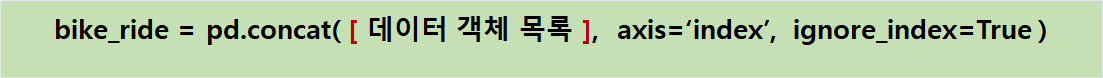

In [ ]:
# 세개의 bike_1, bike_2, bike_3 데이터프레임을 'index'방향으로 붙이고 인덱스를 다시 세팅한다.



In [ ]:
# 실습 : pd.concat()



## 2-2. 데이터프레임 관찰하기

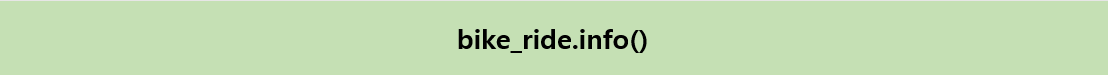

In [ ]:
# bike_ride 의 정보를 알려주는 명령어는 ?



In [ ]:
# 실습 : bike_ride 의 정보를 알려주는 명령어는 ?



In [ ]:
# bike_ride 의 전체 행수는 ?

bike_ride.shape[0]

In [ ]:
# 실습 : bike_ride 의 전체 행수는 ?



In [ ]:
# bike_ride 의 인덱스는 ?

bike_ride.index

In [ ]:
# 실습 : bike_ride 의 인덱스는 ?



In [ ]:
# bike_ride 의 열수는 ?

bike_ride.shape[1]

In [ ]:
# 실습 : bike_ride 의 열수는 ?



In [ ]:
# bike_ride 의 컬럼은 ?

bike_ride.columns

In [ ]:
# 실습 : bike_ride 의 컬럼은 ?



In [ ]:
# bike_ride 의 컬럼의 데이터타입은 ?

bike_ride.dtypes

In [ ]:
# 실습 : bike_ride 의 컬럼의 데이터타입은 ?



In [ ]:
# bike_ride 의 shape은 ?



In [ ]:
# 실습 : bike_ride 의 shape은 ?



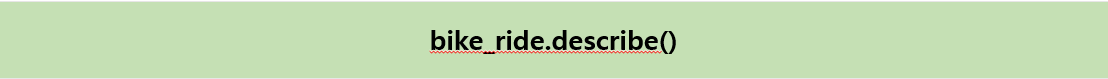

In [ ]:
# bike_ride 데이터프레임의 요약통계 알아보기



분석결과 : 이용시간은 평균이 약 27분, 이용거리는 약 4km

In [ ]:
# 실습 : bike_ride 데이터프레임의 요약통계 알아보기



In [ ]:
# 데이터타입이 object와 np.datetime64인 경우의 요약통계

bike_ride.describe(include = ['object', 'datetime64'])

분석결과 : 대여소는 1543 개가 있고,   자전거는 19029 대가 있다. 대여 대여소명과 반납대여소명에서 가장 빈도가 많은 것은 뚝섬유원지역 1번출구 앞이다. 


In [ ]:
# 실습 : 데이터타입이 object와 np.datetime64인 경우의 요약통계



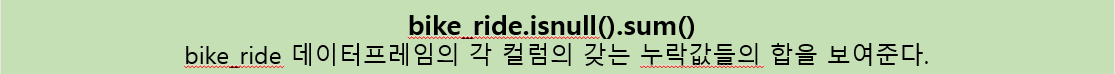

In [ ]:
# 누락값 조사
# 1단계 -> 전체 데이터프레임의 각각의 컬럼값이 null인지 판단한다.



In [ ]:
# 실습 : 1단계 -> 전체 데이터프레임의 각각의 컬럼값이 null인지 판단한다.



In [ ]:
# 누락값 조사
# 2단계 -> 각각의 컬럼값의 합을 구한다.

bike_ride.isnull().****

In [ ]:
# 실습 : 2단계 -> 각각의 컬럼값의 합을 구한다.



## 2-3. 분석주제에 맞는 새로운 컬럼 추가하기

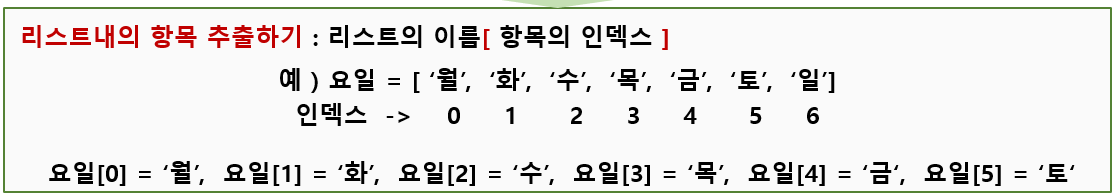

In [ ]:
# 요일 이라는 리스트를 만든다.

요일 = ['월','화','수','목','금','토','일']
요일

In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# 1단계 >  bike_ride['대여일시']는 날짜 데이터타입을 가진다.

bike_ride['대여일시']

In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# 실습 : 1단계 > bike_ride['대여일시']는 날짜 데이터타입을 가진다.



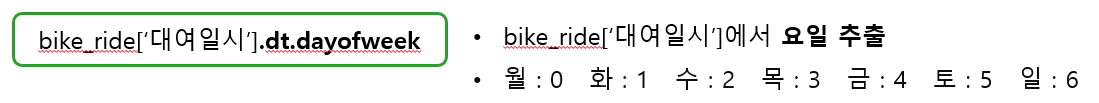

In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# 2단계 > bike_ride['대여일시']에서 요일을 추출한다. -> 0:월 1:화 2:수 3:목 4:금 5:토 6:일

bike_ride['대여일시'].****

In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# 실습 : 2단계 > bike_ride['대여일시']에서 요일을 추출한다. -> 0:월 1:화 2:수 3:목 4:금 5:토 6:일



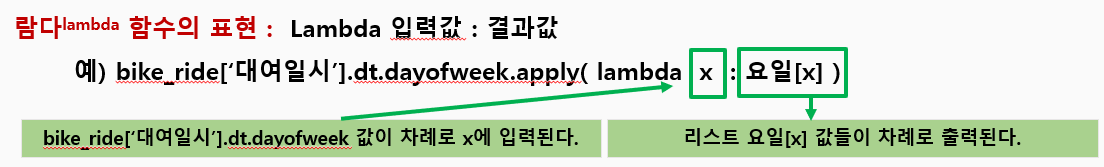

In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# 3단계 : apply 명령어와 lambda함수를 사용하여 0~6값을 월~일 값으로 변환시킨다.

bike_ride['대여일시'].dt.dayofweek.apply( **** )

In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# 실습 : 3단계 > apply 명령어와 lambda함수를 사용하여 0~6값을 월~일 값으로 변환시킨다.



In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# 4단계 > bike_ride에 새로운 컬럼인 '요일'을 추가한다.

bike_ride['요일'] = bike_ride['대여일시'].dt.dayofweek.apply(lambda x: 요일[x])
bike_ride['요일']

In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# 실습 : 4단계 > bike_ride에 새로운 컬럼인 '요일'을 추가한다.



In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# bike_ride에 '요일'컬럼이 추가된 것을 확인한다.

bike_ride.head()

In [ ]:
# 일자 비교를 위해서 요일 컬럼 추가
# 실습 : bike_ride에 '요일'컬럼이 추가된 것을 확인한다.



In [ ]:
# 주중/주말공휴일 구분
bike_ride['주말구분'] = bike_ride['대여일시'].dt.dayofweek.apply(\
                                lambda x : '평일' if x < 5 else '주말')

# 일자 컬럼 추가
bike_ride['일자'] = bike_ride['대여일시'].dt.day

# 대여시간대와 반납시간대 컬럼 추가
bike_ride['대여시간대'] = bike_ride['대여일시'].dt.hour
bike_ride['반납시간대'] =  bike_ride['반납일시'].dt.hour

In [ ]:
# 위에서 만든 시간개념 컬럼들이 추가된 bike_ride 데이터프레임을 살펴본다.

bike_ride.head()

In [ ]:
실습 : # 위에서 만든 시간개념 컬럼들이 추가된 bike_ride 데이터프레임을 살펴본다.
